In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read in data
embedding_genotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/X_k_5_ilvm_esm_prod_pppl_full_ptv.csv")
phenotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/y_ilvm_oh.csv")
# save column names
colnames = embedding_genotype.columns
# make genotype a numpy array
embedding_genotype = embedding_genotype.to_numpy()
# make phenotype a 1D numpy array
phenotype = phenotype.to_numpy().reshape(-1)

In [3]:
# obtain same train-test split as the experiment, so that gender/age are aligned
embedding_genotype_train, embedding_genotype_test, phenotype_train, phenotype_test = \
        train_test_split(embedding_genotype, phenotype, test_size = 0.3,
                         random_state = 1)

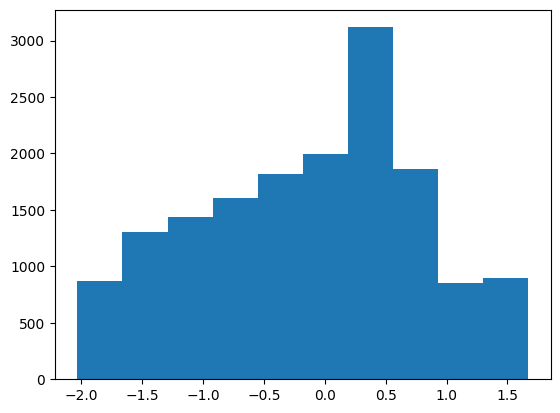

In [4]:
# plot histogram of genotype column -11
plt.hist(embedding_genotype_train[:, -11], bins = 10)
plt.show()

In [5]:
# read in results
lmdi_importances = pd.read_csv('lmdi_plus_importance_scores_embedding_data.csv',
                               header=None)
lmdi_importances.columns = colnames
lmdi_importances.head()

,ENSG00000155657_esm_prod_0,ENSG00000155657_esm_prod_1,ENSG00000155657_esm_prod_2,ENSG00000155657_esm_prod_3,ENSG00000155657_esm_prod_4,ENSG00000155657_esm_prod_5,ENSG00000155657_esm_prod_6,ENSG00000155657_esm_prod_7,ENSG00000155657_esm_prod_8,ENSG00000155657_esm_prod_9,...,2,3,4,5,6,7,8,9,10,11
0,0.000058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,1.596637e-10,...,-0.000001,0.000288,0.000380,-0.000001,-4.156927e-06,0.000000e+00,0.000000e+00,-2.210195e-05,0.000000e+00,0.0
1,-0.000741,0.0,1.755054e-06,0.0,0.0,0.0,0.0,0.0,0.000139,0.000000e+00,...,0.000000,0.000300,0.000370,-0.000018,4.859730e-06,0.000000e+00,-5.211002e-07,-1.821289e-05,-4.148320e-04,0.0
2,0.000000,0.0,4.140194e-04,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.000000,0.000467,0.000415,-0.000016,6.811056e-07,0.000000e+00,0.000000e+00,-7.350659e-06,-4.693606e-07,0.0
3,0.000025,0.0,5.023508e-06,0.0,0.0,0.0,0.0,0.0,0.000134,0.000000e+00,...,0.000000,0.000332,0.000331,-0.000005,-1.169532e-06,0.000000e+00,0.000000e+00,5.171850e-06,0.000000e+00,0.0
4,0.000025,0.0,-9.885800e-08,0.0,0.0,0.0,0.0,0.0,0.000104,-9.097819e-08,...,-0.000001,0.000354,0.000394,-0.000004,-3.945737e-06,-3.958127e-07,0.000000e+00,-6.196232e-08,6.967742e-09,0.0


In [6]:
# Extract the feature name (part before the first underscore)
feature_names = colnames.str.split('_').str[0]

In [7]:
# Group by feature name and sum the columns
lmdi_importances = np.abs(lmdi_importances).groupby(feature_names, axis=1).mean()

/tmp/ipykernel_220555/3392140862.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  lmdi_importances = np.abs(lmdi_importances).groupby(feature_names, axis=1).mean()


In [8]:
# get new column names
new_colnames = lmdi_importances.columns

In [9]:
lmdi_importances.head()

,0,1,10,11,2,3,4,5,6,7,8,9,ENSG00000117791,ENSG00000136319,ENSG00000155657,ENSG00000177464,ENSG00000185294
0,0.965535,0.029596,0.000000e+00,0.0,0.000001,0.000288,0.000380,0.000001,4.156927e-06,0.000000e+00,0.000000e+00,2.210195e-05,0.0,3.293762e-11,2.897383e-07,0.0,3.481956e-11
1,0.953893,0.028825,4.148320e-04,0.0,0.000000,0.000300,0.000370,0.000018,4.859730e-06,0.000000e+00,5.211002e-07,1.821289e-05,0.0,4.015639e-13,1.126645e-06,0.0,4.045131e-12
2,0.934472,0.050154,4.693606e-07,0.0,0.000000,0.000467,0.000415,0.000016,6.811056e-07,0.000000e+00,0.000000e+00,7.350659e-06,0.0,6.970628e-12,1.009456e-06,0.0,6.296037e-12
3,0.965430,0.028508,0.000000e+00,0.0,0.000000,0.000332,0.000331,0.000005,1.169532e-06,0.000000e+00,0.000000e+00,5.171850e-06,0.0,3.892784e-13,3.759432e-07,0.0,1.203752e-11
4,0.883172,0.024563,6.967742e-09,0.0,0.000001,0.000354,0.000394,0.000004,3.945737e-06,3.958127e-07,0.000000e+00,6.196232e-08,0.0,1.801785e-11,6.370772e-06,0.0,3.422697e-11


In [10]:
# get importances for men and women
lmdi_importances_men = lmdi_importances[embedding_genotype_train[:,-12]==1]
lmdi_importances_women = lmdi_importances[embedding_genotype_train[:,-12]==0]

In [11]:
# get importances for "old" and "young" (above/below 0 on standardardized age)
lmdi_importances_old = lmdi_importances[embedding_genotype_train[:,-11] > 0]
lmdi_importances_young = lmdi_importances[embedding_genotype_train[:,-11] <= 0]

In [12]:
# get importances for gender and age
lmdi_importances_old_men = lmdi_importances[(embedding_genotype_train[:,-12]==1) & (embedding_genotype_train[:,-11] > 0)]
lmdi_importances_old_women = lmdi_importances[(embedding_genotype_train[:,-12]==0) & (embedding_genotype_train[:,-11] > 0)]
lmdi_importances_young_men = lmdi_importances[(embedding_genotype_train[:,-12]==1) & (embedding_genotype_train[:,-11] <= 0)]
lmdi_importances_young_women = lmdi_importances[(embedding_genotype_train[:,-12]==0) & (embedding_genotype_train[:,-11] <= 0)]

In [13]:
# get rankings
lmdi_rankings = lmdi_importances.shape[1]-np.argsort(np.abs(lmdi_importances), axis = 1)

# rankings for gender
lmdi_rankings_men = lmdi_importances_men.shape[1]-np.argsort(np.abs(lmdi_importances_men), axis = 1)
lmdi_rankings_women = lmdi_importances_women.shape[1]-np.argsort(np.abs(lmdi_importances_women), axis = 1)

# rankings for age
lmdi_rankings_old = lmdi_importances_old.shape[1]-np.argsort(np.abs(lmdi_importances_old), axis = 1)
lmdi_rankings_young = lmdi_importances_young.shape[1]-np.argsort(np.abs(lmdi_importances_young), axis = 1)

# rankings for age & gender
lmdi_rankings_old_men = lmdi_importances_old_men.shape[1]-np.argsort(np.abs(lmdi_importances_old_men), axis = 1)
lmdi_rankings_old_women = lmdi_importances_old_women.shape[1]-np.argsort(np.abs(lmdi_importances_old_women), axis = 1)
lmdi_rankings_young_men = lmdi_importances_young_men.shape[1]-np.argsort(np.abs(lmdi_importances_young_men), axis = 1)
lmdi_rankings_young_women = lmdi_importances_young_women.shape[1]-np.argsort(np.abs(lmdi_importances_young_women), axis = 1)

# make them dataframes with the same column names
lmdi_rankings = pd.DataFrame(lmdi_rankings, columns = new_colnames)
lmdi_rankings_men = pd.DataFrame(lmdi_rankings_men, columns = new_colnames)
lmdi_rankings_women = pd.DataFrame(lmdi_rankings_women, columns = new_colnames)
lmdi_rankings_old = pd.DataFrame(lmdi_rankings_old, columns = new_colnames)
lmdi_rankings_young = pd.DataFrame(lmdi_rankings_young, columns = new_colnames)
lmdi_rankings_old_men = pd.DataFrame(lmdi_rankings_old_men, columns = new_colnames)
lmdi_rankings_old_women = pd.DataFrame(lmdi_rankings_old_women, columns = new_colnames)
lmdi_rankings_young_men = pd.DataFrame(lmdi_rankings_young_men, columns = new_colnames)
lmdi_rankings_young_women = pd.DataFrame(lmdi_rankings_young_women, columns = new_colnames)

In [14]:
# get the most important genes
print("Most Important Genes (Overall): Average LMDI+ Score")
print(np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False))
top_genes_overall = np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Overall): Average LMDI+ Score
0                  9.559041e-01
1                  1.502168e-02
4                  3.527430e-03
3                  2.611389e-03
5                  1.097138e-04
9                  5.616715e-05
6                  3.458527e-05
2                  8.351031e-06
10                 6.252818e-06
8                  1.510368e-06
ENSG00000155657    1.503399e-06
7                  7.398582e-07
ENSG00000185294    2.841375e-07
ENSG00000136319    4.059637e-08
11                 0.000000e+00
ENSG00000117791    0.000000e+00
ENSG00000177464    0.000000e+00
dtype: float64


In [15]:
# get the most important genes
print("Most Important Genes (Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False))
top_genes_men = np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False).index
print("Most Important Genes (Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False))
top_genes_women = np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Men): Average LMDI+ Score
0                  9.344040e-01
1                  3.100540e-02
4                  5.972581e-03
3                  4.454992e-03
5                  1.106660e-04
9                  8.625243e-05
6                  6.811428e-05
2                  7.514162e-06
10                 4.377979e-06
ENSG00000155657    1.514999e-06
8                  9.687162e-07
7                  4.912088e-07
ENSG00000136319    5.315755e-08
ENSG00000185294    3.919621e-08
11                 0.000000e+00
ENSG00000117791    0.000000e+00
ENSG00000177464    0.000000e+00
dtype: float64
Most Important Genes (Women): Average LMDI+ Score
0                  9.752086e-01
4                  1.331971e-03
3                  9.560494e-04
1                  6.701582e-04
5                  1.088589e-04
9                  2.915409e-05
2                  9.102442e-06
10                 7.936204e-06
6                  4.480131e-06
8                  1.996708e-06
ENSG00000155657    1.49

In [16]:
# get the most important genes
print("Most Important Genes (Old): Average LMDI+ Score")
print(np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young): Average LMDI+ Score")
print(np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False))
top_genes_old = np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False).index
top_genes_young = np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old): Average LMDI+ Score
0                  9.626220e-01
1                  1.375187e-02
4                  2.394050e-03
3                  1.730518e-03
5                  1.165286e-04
6                  5.496523e-05
9                  3.414627e-05
10                 6.625175e-06
2                  3.622961e-06
ENSG00000155657    1.323754e-06
8                  1.297000e-06
7                  4.793677e-07
ENSG00000185294    2.328852e-07
ENSG00000136319    3.635320e-08
11                 0.000000e+00
ENSG00000117791    0.000000e+00
ENSG00000177464    0.000000e+00
dtype: float64
Most Important Genes (Young): Average LMDI+ Score
0                  9.499876e-01
1                  1.613999e-02
4                  4.525588e-03
3                  3.387165e-03
5                  1.037121e-04
9                  7.556075e-05
6                  1.663681e-05
2                  1.251500e-05
10                 5.924886e-06
8                  1.698279e-06
ENSG00000155657    1.66

In [17]:
# get the most important genes
print("Most Important Genes (Old Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Old Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False))
top_genes_old_men = np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False).index
top_genes_old_women = np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False).index
top_genes_young_men = np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False).index
top_genes_young_women = np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old Men): Average LMDI+ Score
0                  9.496213e-01
1                  2.586072e-02
4                  3.643885e-03
3                  2.769448e-03
5                  1.187600e-04
6                  1.017926e-04
9                  4.249313e-05
10                 4.770579e-06
2                  1.946116e-06
ENSG00000155657    1.217336e-06
8                  6.742712e-07
7                  3.627751e-07
ENSG00000136319    5.890921e-08
ENSG00000185294    5.716680e-08
11                 0.000000e+00
ENSG00000117791    0.000000e+00
ENSG00000177464    0.000000e+00
dtype: float64
Most Important Genes (Old Women): Average LMDI+ Score
0                  9.766963e-01
4                  1.041001e-03
1                  6.430414e-04
3                  6.057923e-04
5                  1.141129e-04
9                  2.511012e-05
10                 8.632926e-06
2                  5.438283e-06
6                  4.270740e-06
8                  1.971155e-06
ENSG00000155657

In [18]:
# check the rankings overlap for top genes
overlap_gender = np.intersect1d(top_genes_men, top_genes_women)
overlap_age = np.intersect1d(top_genes_old, top_genes_young)
overlap_age_gender = np.intersect1d(np.intersect1d(top_genes_old_men,
                                                   top_genes_old_women),
                                    np.intersect1d(top_genes_young_men,
                                                   top_genes_young_women))
print(f"There is a {overlap_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Men and Women). " +
      f"The intersection is \n{overlap_gender}.")
print(f"There is a {overlap_age.shape[0]/10.0*100:.2f}% " + 
      "Overlap of Top Genes (Old and Young). " +
      f"The intersection is \n{overlap_age}.")
print(f"There is a {overlap_age_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Age x Gender). " +
      f"The intersection is \n{overlap_age_gender}.")

There is a 170.00% Overlap of Top Genes (Men and Women). The intersection is 
['0' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9' 'ENSG00000117791'
 'ENSG00000136319' 'ENSG00000155657' 'ENSG00000177464' 'ENSG00000185294'].
There is a 170.00% Overlap of Top Genes (Old and Young). The intersection is 
['0' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9' 'ENSG00000117791'
 'ENSG00000136319' 'ENSG00000155657' 'ENSG00000177464' 'ENSG00000185294'].
There is a 170.00% Overlap of Top Genes (Age x Gender). The intersection is 
['0' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9' 'ENSG00000117791'
 'ENSG00000136319' 'ENSG00000155657' 'ENSG00000177464' 'ENSG00000185294'].
